In [1]:
# build a simple linear regression in python
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
import scipy as sp
plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', 300)

In [2]:
#read in height weight data
weight_df = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/nyc-mhtn-ds-071519-lectures/master/week-1/Descriptive_Statistics/weight-height.csv')

In [3]:
# building a linear regression model using statsmodel 
lr_model = ols(formula='Weight~Height', data=weight_df).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 5.904e+04
Date:                Wed, 12 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:17:56   Log-Likelihood:                -39219.
No. Observations:               10000   AIC:                         7.844e+04
Df Residuals:                    9998   BIC:                         7.846e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -350.7372      2.111   -166.109      0.000    -354.876    -346.598
Height         7.7173      0.032    242.975      0.000       7.655       7.780
==============================================================================
Omnibus:                        2.141   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                2.150
Skew:                           0.036   Prob(JB):                        0.341
Kurtosis:                       2.991   Cond. No.                     1.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


##  Coefficient of Determination ($R^2$)

The _coefficient of determination_, is a measure of how well the model fits the data.

$R^2$ for a model is ultimately a _relational_ notion. It's a measure of goodness of fit _relative_ to a (bad) baseline model. This bad baseline model is simply the horizontal line $y = \mu_Y$, for dependent variable $Y$.


$$\text{TSS }= \text{ESS} + \text{RSS }$$

- TSS or SST = Total Sum of Squares 
- ESS or SSE = Explained Sum of Squares
- RSS or SSR = Residual Sum of Squares

The actual calculation of $R^2$ is: <br/> $$\Large R^2= \frac{\Sigma_i(\bar{y} - \hat{y}_i)^2}{\Sigma_i(y_i - \bar{y})^2}=1- \frac{\Sigma_i(y_i - \hat{y}_i)^2}{\Sigma_i(y_i - \bar{y})^2}$$.

$R^2$ takes values between 0 and 1.

$R^2$ is a measure of how much variation in the dependent variable your model explains.


<img src='https://pbs.twimg.com/media/D-Gu7E0WsAANhLY.png' width ="700">

### Applied 
Build a linear regression model that will estimate the gross revenue of a film from the budget of the film. 

In [6]:
df = pd.read_csv('movie_metadata.csv')
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [7]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [63]:
# building a linear regression model using statsmodel 
movie_model = ols(formula='gross~budget+superstar+rating', data=df).fit()



Look at the summary table of this model.  

In [64]:
movie_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     109.6
Date:                Wed, 12 Feb 2020   Prob (F-statistic):          1.11e-128
Time:                        16:46:52   Log-Likelihood:                -80630.
No. Observations:                4159   AIC:                         1.613e+05
Df Residuals:                    4152   BIC:                         1.613e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          7.776e+07   6.54e+06     11.892      0.000    6.49e+07    9.06e+07
rating[T.PG]      -1.347e+07   7.03e+06     -1.917      0.055   -2.72e+07    3.04e+05
rating[T.PG-13]   -2.243e+07   6.76e+06     -3.318      0.001   -3.57e+07   -9.18e+06
rating[T.R]       -5.683e+07   6.71e+06     -8.476      0.000      -7e+07   -4.37e+07
rating[T.unrated]  -7.15e+07   7.95e+06     -8.990      0.000   -8.71e+07   -5.59e+07
budget                0.0263      0.005      5.727      0.000       0.017       0.035
superstar          2.896e+07   2.24e+06     12.908      0.000    2.46e+07    3.34e+07
==============================================================================
Omnibus:                     2741.813   Durbin-Watson:                   1.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46527.695
Skew:                           2.908   Prob(JB):                         0.00
Kurtosis:                      18.319   Cond. No.                     3.30e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Transform your the output of the model into an equation. Then write a sentnce that interprets interprets what the independent variable and y-intercept mean. 

Equation: Gross = 49,610,000 +.032(budget)



Sentence: 

What does the P-value of the budget coeffiecient mean?

Answer:

Write a sentence interpreting the $R^2$ value from your movie model.

Sentence: 

---

**Cross-industry standard process for data mining**, known as **CRISP-DM**, is an open standard process model that describes common approaches used by data mining experts. It is the most widely-used analytics model.

6 high level phases of the data mining process:
- Business Understanding
- Data Understanding
- Data Preparation
- Modeling
- Evaluation
- Deployment
The sequence of the phases is not strict and moving back and forth between different phases as it is always required.


<img src='https://www.kdnuggets.com/wp-content/uploads/crisp-dm-4-problems-fig1.png' width ="400">

## Context:

Today we are going to be working with the IMDB movie data set.  Our goal is to eventually create a linear regression model that will enable us to predict the box office gross of a movie based on characteristics of the movie.

Before we can start to model, we need to make sure our data is clean an in a usable format.  Therefore we will go through several steps of data cleaning. The code below is not a fully exhaustive list, but includes many of the process you will go through to clean data.  

### Check Your Data … Quickly
The first thing you want to do when you get a new dataset, is to quickly to verify the contents with the .head() method.

In [10]:
print(df.shape)
df.head()


(5043, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Now let’s quickly see the names and types of the columns. Most of the time you’re going get data that is not quite what you expected, such as dates which are actually strings and other oddities. But to check upfront.

In [11]:
# Get column names
column_names = df.columns
print(column_names)



Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


In [12]:
# Get column data types
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

## Convert a column to a different data type

The most common example of this is converting a string of number to an actual float or integer.  There are two ways you can achieve this.  

1. astype(float) method

`df['DataFrame Column'] = df['DataFrame Column'].astype(float)`
2.  to_numeric method

`df['DataFrame Column'] = pd.to_numeric(df['DataFrame Column'],errors='coerce')`

What is the difference in these two methods?

(1) For a column that contains numeric values stored as strings;

(2) For a column that contains both numeric and non-numeric values. By setting errors=’coerce’, you’ll transform the non-numeric values into NaN.


https://datatofish.com/convert-string-to-float-dataframe/

In [ ]:
pd.to_numeric()

In [13]:
df['title_year']

0       2009.0
1       2007.0
2       2015.0
3       2012.0
4          NaN
5       2012.0
6       2007.0
7       2010.0
8       2015.0
9       2009.0
10      2016.0
11      2006.0
12      2008.0
13      2006.0
14      2013.0
15      2013.0
16      2008.0
17      2012.0
18      2011.0
19      2012.0
20      2014.0
21      2012.0
22      2010.0
23      2013.0
24      2007.0
25      2005.0
26      1997.0
27      2016.0
28      2012.0
29      2015.0
         ...  
5013    2002.0
5014    2009.0
5015    1991.0
5016    2015.0
5017    2013.0
5018    2003.0
5019    2015.0
5020    2011.0
5021    2005.0
5022    2014.0
5023    2009.0
5024    2011.0
5025    1972.0
5026    2004.0
5027    2000.0
5028    2007.0
5029    1997.0
5030    2004.0
5031    2012.0
5032    1995.0
5033    2004.0
5034    2005.0
5035    1992.0
5036    2005.0
5037    2011.0
5038    2013.0
5039       NaN
5040    2013.0
5041    2012.0
5042    2004.0
Name: title_year, Length: 5043, dtype: float64

In [16]:
 pd.to_datetime(df['title_year'], format='%Y')

0      2009-01-01
1      2007-01-01
2      2015-01-01
3      2012-01-01
4             NaT
5      2012-01-01
6      2007-01-01
7      2010-01-01
8      2015-01-01
9      2009-01-01
10     2016-01-01
11     2006-01-01
12     2008-01-01
13     2006-01-01
14     2013-01-01
15     2013-01-01
16     2008-01-01
17     2012-01-01
18     2011-01-01
19     2012-01-01
20     2014-01-01
21     2012-01-01
22     2010-01-01
23     2013-01-01
24     2007-01-01
25     2005-01-01
26     1997-01-01
27     2016-01-01
28     2012-01-01
29     2015-01-01
          ...    
5013   2002-01-01
5014   2009-01-01
5015   1991-01-01
5016   2015-01-01
5017   2013-01-01
5018   2003-01-01
5019   2015-01-01
5020   2011-01-01
5021   2005-01-01
5022   2014-01-01
5023   2009-01-01
5024   2011-01-01
5025   1972-01-01
5026   2004-01-01
5027   2000-01-01
5028   2007-01-01
5029   1997-01-01
5030   2004-01-01
5031   2012-01-01
5032   1995-01-01
5033   2004-01-01
5034   2005-01-01
5035   1992-01-01
5036   2005-01-01
5037   201

### Drop Columns

If you do not plan on using some data in your analysis, feel free to drop those columns. 

In [17]:
print(df.columns)

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


In [18]:
df.drop(columns=['aspect_ratio', 'plot_keywords'], inplace=True)

In [19]:
df.shape

(5043, 26)

## Investigate the data

In [20]:
#look at the unique values for ratings
ratings = list(df['content_rating'].unique())
ratings

['PG-13',
 nan,
 'PG',
 'G',
 'R',
 'TV-14',
 'TV-PG',
 'TV-MA',
 'TV-G',
 'Not Rated',
 'Unrated',
 'Approved',
 'TV-Y',
 'NC-17',
 'X',
 'TV-Y7',
 'GP',
 'Passed',
 'M']

In [41]:
df['content_rating'].value_counts()

R            1856
PG-13        1400
PG            611
G              95
Not Rated      57
Unrated        34
Approved       18
X              10
NC-17           6
Passed          3
M               2
TV-MA           2
GP              1
Name: content_rating, dtype: int64

There are many unique values that don't have a high count or don't make sense to the common user.  How should we handle these?

In [22]:
#create a list of the ratings we want to group
unrated = ['Unrated','Approved', 'Not Rated', 'TV-MA', 'M', 'GP', 'Passed', np.nan, 'X', 'NC-17']

In [23]:
#create a list of the movie ratings we want to maintian
rated = [x for x in ratings if x not in unrated]

In [24]:
rated

['PG-13', 'PG', 'G', 'R', 'TV-14', 'TV-PG', 'TV-G', 'TV-Y', 'TV-Y7']

In [25]:
unrated

['Unrated',
 'Approved',
 'Not Rated',
 'TV-MA',
 'M',
 'GP',
 'Passed',
 nan,
 'X',
 'NC-17']

In [26]:
#create a dictionary with keys of the 'unrated' values and the value being 'unrated'
unrated_dict = dict.fromkeys(unrated, 'unrated')

In [27]:
unrated_dict

{'Unrated': 'unrated',
 'Approved': 'unrated',
 'Not Rated': 'unrated',
 'TV-MA': 'unrated',
 'M': 'unrated',
 'GP': 'unrated',
 'Passed': 'unrated',
 nan: 'unrated',
 'X': 'unrated',
 'NC-17': 'unrated'}

In [28]:
#create a dictionary of the rated values
rated_dict  = dict(zip(rated, rated))

In [29]:
rated_dict

{'PG-13': 'PG-13',
 'PG': 'PG',
 'G': 'G',
 'R': 'R',
 'TV-14': 'TV-14',
 'TV-PG': 'TV-PG',
 'TV-G': 'TV-G',
 'TV-Y': 'TV-Y',
 'TV-Y7': 'TV-Y7'}

In [30]:
#combine those ditionaries into 1
ratings_map = {**rated_dict,**unrated_dict}
ratings_map

{'PG-13': 'PG-13',
 'PG': 'PG',
 'G': 'G',
 'R': 'R',
 'TV-14': 'TV-14',
 'TV-PG': 'TV-PG',
 'TV-G': 'TV-G',
 'TV-Y': 'TV-Y',
 'TV-Y7': 'TV-Y7',
 'Unrated': 'unrated',
 'Approved': 'unrated',
 'Not Rated': 'unrated',
 'TV-MA': 'unrated',
 'M': 'unrated',
 'GP': 'unrated',
 'Passed': 'unrated',
 nan: 'unrated',
 'X': 'unrated',
 'NC-17': 'unrated'}

#### What does `**` do? 

It basically takes the dictionary passed through and unpacks it.  

https://medium.com/understand-the-python/understanding-the-asterisk-of-python-8b9daaa4a558

https://pynash.org/2013/03/13/unpacking/

In [31]:
# use the pandas map function to change the content_rating column
df['rating'] = df['content_rating'].map(ratings_map)

In [34]:
#compare the two columns
df[['rating', 'content_rating']].tail(100)

,rating,content_rating
4943,R,R
4944,R,R
4945,unrated,NaN
4946,unrated,NaN
4947,R,R
4948,PG-13,PG-13
4949,unrated,NaN
4950,unrated,NaN
4951,unrated,Unrated
4952,unrated,NaN


## Handling Missing Data:
    


In [35]:
#creates a dataframe of booleans show where data is missing
df.isna().head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,True,True,False,True,False,False,True,False,False,False,False,False,True,False,False,True,True,True,True,True,True,False,False,False,False


In [36]:
# Find the Percentage of rows missing data
df.isna().mean()

color                        0.003768
director_name                0.020623
num_critic_for_reviews       0.009915
duration                     0.002974
director_facebook_likes      0.020623
actor_3_facebook_likes       0.004561
actor_2_name                 0.002578
actor_1_facebook_likes       0.001388
gross                        0.175292
genres                       0.000000
actor_1_name                 0.001388
movie_title                  0.000000
num_voted_users              0.000000
cast_total_facebook_likes    0.000000
actor_3_name                 0.004561
facenumber_in_poster         0.002578
movie_imdb_link              0.000000
num_user_for_reviews         0.004164
language                     0.002380
country                      0.000991
content_rating               0.060083
budget                       0.097561
title_year                   0.021416
actor_2_facebook_likes       0.002578
imdb_score                   0.000000
movie_facebook_likes         0.000000
rating      

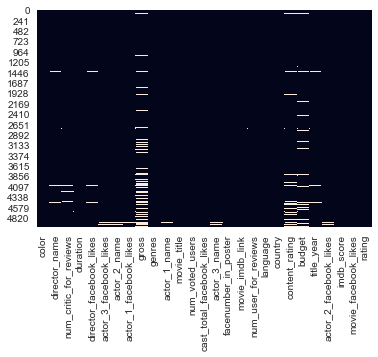

In [37]:
#graphically see the missing data
sns.heatmap(df.isna(), cbar=False)

#### Dropping missing rows

One way to handle missing data is just to drop the observation from the data set. This is not always the ideal way since you will lose obseervations, but it might be unavoidable.  For example, we want to predict the gross earnings for each film, so we have to remove those that don't have value for gross.

In [38]:
df.dropna(subset=['gross'], inplace=True)

In [39]:
df.shape

(4159, 27)

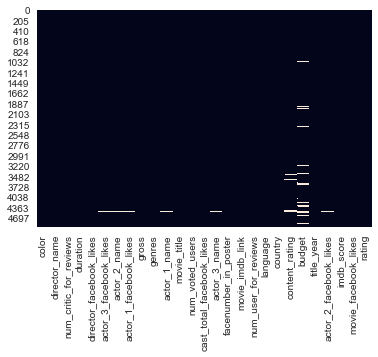

In [40]:
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
#look at all the observations with at least one missing data point
df[df['budget'].isna()].head()

Quite a few films are still missing the values for budget. We do not want to drop this column because we believe it is an important variable, but we must have a value for each observation in order to use it.

**Talk with a partner to think of different ways you can fill in the missing budget values?**

In [42]:
#you can fill the missing values with the average value of the observations
df['budget'].fillna(df['budget'].mean(), inplace=False)

0       2.370000e+08
1       3.000000e+08
2       2.450000e+08
3       2.500000e+08
5       2.637000e+08
6       2.580000e+08
7       2.600000e+08
8       2.500000e+08
9       2.500000e+08
10      2.500000e+08
11      2.090000e+08
12      2.000000e+08
13      2.250000e+08
14      2.150000e+08
15      2.250000e+08
16      2.250000e+08
17      2.200000e+08
18      2.500000e+08
19      2.250000e+08
20      2.500000e+08
21      2.300000e+08
22      2.000000e+08
23      2.250000e+08
24      1.800000e+08
25      2.070000e+08
26      2.000000e+08
27      2.500000e+08
28      2.090000e+08
29      1.500000e+08
30      2.000000e+08
            ...     
4974    4.521028e+07
4975    6.000000e+04
4977    6.500000e+04
4978    6.000000e+04
4979    7.000000e+04
4984    2.500000e+04
4987    6.500000e+04
4997    4.200000e+04
4998    4.000000e+04
5001    4.521028e+07
5003    4.521028e+07
5004    3.000000e+04
5007    4.521028e+07
5008    2.300000e+05
5009    2.700000e+04
5011    2.500000e+04
5012    3.500

Another way to fill the missing data

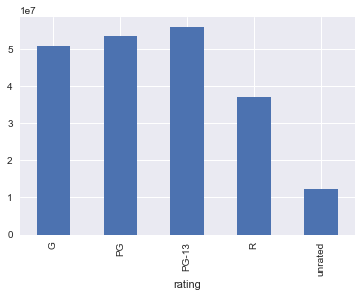

In [43]:
df.groupby('rating')['budget'].mean().plot(kind='bar')

In [44]:
budget_ratings = df.groupby('rating')['budget'].mean().round(1).to_dict()
budget_ratings

{'G': 50911615.4,
 'PG': 53575683.2,
 'PG-13': 55784951.6,
 'R': 36998505.3,
 'unrated': 12208128.2}

In [45]:
df['budget'].fillna(df['rating'].map(budget_ratings), inplace=True)


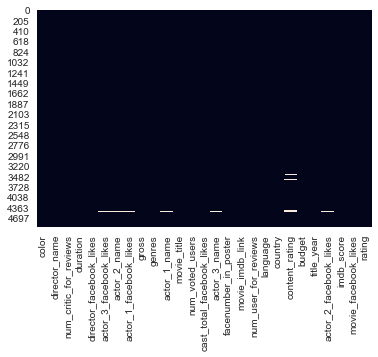

In [46]:
sns.heatmap(df.isnull(), cbar=False)

What statistical test could we use to support our use of this method?

### Handling Categorical Data

https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40

In [47]:
df['rating'].value_counts()

R          1856
PG-13      1400
PG          611
unrated     197
G            95
Name: rating, dtype: int64

In [48]:
df['rating'].head(10)

0     PG-13
1     PG-13
2     PG-13
3     PG-13
5     PG-13
6     PG-13
7        PG
8     PG-13
9        PG
10    PG-13
Name: rating, dtype: object

In [49]:
pd.get_dummies(df['rating']).head(10)

,G,PG,PG-13,R,unrated
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
5,0,0,1,0,0
6,0,0,1,0,0
7,0,1,0,0,0
8,0,0,1,0,0
9,0,1,0,0,0
10,0,0,1,0,0


In [50]:
df = pd.concat([df, pd.get_dummies(df['rating'])], 1)
df.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,rating,G,PG,PG-13,R,unrated
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,PG-13,0,0,1,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0,PG-13,0,0,1,0,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000,PG-13,0,0,1,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000,PG-13,0,0,1,0,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000,PG-13,0,0,1,0,0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,0,PG-13,0,0,1,0,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,29000,PG,0,1,0,0,0
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,118000,PG-13,0,0,1,0,0
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,10000,PG,0,1,0,0,0
10,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,Henry Cavill,Batman v Superman: Dawn of Justice,371639,24450,Alan D. Purwin,0.0,http://www.imdb.com/title/tt2975590/?ref_=fn_t...,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,197000,PG-13,0,0,1,0,0


## Removing Outliers

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

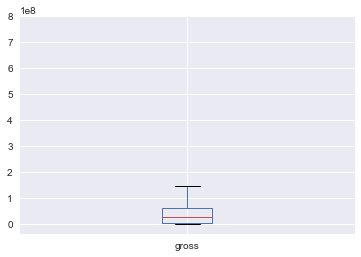

In [51]:
df.boxplot(['gross'])

In [52]:
df.sort_values('gross', ascending=False)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,rating,G,PG,PG-13,R,unrated
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,PG-13,0,0,1,0,0
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,26000,PG-13,0,0,1,0,0
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,150000,PG-13,0,0,1,0,0
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,123000,PG-13,0,0,1,0,0
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,123000,PG-13,0,0,1,0,0
66,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,57802,Morgan Freeman,0.0,http://www.imdb.com/title/tt0468569/?ref_=fn_t...,4667.0,English,USA,PG-13,185000000.0,2008.0,13000.0,9.0,37000,PG-13,0,0,1,0,0
240,Color,George Lucas,320.0,136.0,0.0,1000.0,Liam Neeson,20000.0,474544677.0,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,37723,Ian McDiarmid,1.0,http://www.imdb.com/title/tt0120915/?ref_=fn_t...,3597.0,English,USA,PG,115000000.0,1999.0,14000.0,6.5,13000,PG,0,1,0,0,0
3024,Color,George Lucas,282.0,125.0,0.0,504.0,Peter Cushing,11000.0,460935665.0,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,13485,Kenny Baker,1.0,http://www.imdb.com/title/tt0076759/?ref_=fn_t...,1470.0,English,USA,PG,11000000.0,1977.0,1000.0,8.7,33000,PG,0,1,0,0,0
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,118000,PG-13,0,0,1,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000,PG-13,0,0,1,0,0


In [53]:
# Calculate gross amount that is 3 times above the standard deviation
above_4std = df.gross.mean()+(4*df.gross.std())

In [54]:
above_4std

322280369.2818208

In [55]:
df[df['gross']>above_4std]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,rating,G,PG,PG-13,R,unrated
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,PG-13,0,0,1,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000,PG-13,0,0,1,0,0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,0,PG-13,0,0,1,0,0
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,118000,PG-13,0,0,1,0,0
10,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,Henry Cavill,Batman v Superman: Dawn of Justice,371639,24450,Alan D. Purwin,0.0,http://www.imdb.com/title/tt2975590/?ref_=fn_t...,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,197000,PG-13,0,0,1,0,0
13,Color,Gore Verbinski,313.0,151.0,563.0,1000.0,Orlando Bloom,40000.0,423032628.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: Dead Man's Chest,522040,48486,Jack Davenport,2.0,http://www.imdb.com/title/tt0383574/?ref_=fn_t...,1832.0,English,USA,PG-13,225000000.0,2006.0,5000.0,7.3,5000,PG-13,0,0,1,0,0
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,123000,PG-13,0,0,1,0,0
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,26000,PG-13,0,0,1,0,0
27,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,Robert Downey Jr.,Captain America: Civil War,272670,64798,Chris Evans,0.0,http://www.imdb.com/title/tt3498820/?ref_=fn_t...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,72000,PG-13,0,0,1,0,0
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,150000,PG-13,0,0,1,0,0


## Creating New columns based on other columns

In [56]:
df['actor_1_facebook_likes'].describe()

count      4155.000000
mean       7344.085921
std       15050.541525
min           0.000000
25%         698.000000
50%        1000.000000
75%       12000.000000
max      640000.000000
Name: actor_1_facebook_likes, dtype: float64

In [57]:
# Create a new column called df.superstar where the value is 1
# if df.actor_1_facebook_likes is greater than 12000 and 0 if not
df['superstar'] = np.where(df['actor_1_facebook_likes']>=12000, 1, 0)

df[['movie_title', 'actor_1_name','actor_1_facebook_likes', 'superstar']].head(10)

,movie_title,actor_1_name,actor_1_facebook_likes,superstar
0,Avatar,CCH Pounder,1000.0,0
1,Pirates of the Caribbean: At World's End,Johnny Depp,40000.0,1
2,Spectre,Christoph Waltz,11000.0,0
3,The Dark Knight Rises,Tom Hardy,27000.0,1
5,John Carter,Daryl Sabara,640.0,0
6,Spider-Man 3,J.K. Simmons,24000.0,1
7,Tangled,Brad Garrett,799.0,0
8,Avengers: Age of Ultron,Chris Hemsworth,26000.0,1
9,Harry Potter and the Half-Blood Prince,Alan Rickman,25000.0,1
10,Batman v Superman: Dawn of Justice,Henry Cavill,15000.0,1


**Create your own new column of data using the method above.**

In [ ]:
#your code here

Another data cleaning Resource:

https://medium.com/@rrfd/cleaning-and-prepping-data-with-python-for-data-science-best-practices-and-helpful-packages-af1edfbe2a3